#ResNet50 XAI

##1. Installing Packages

In [1]:
! pip install omnixai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##2. Importing Packages

In [3]:
#Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [4]:
import shap

In [5]:
from PIL import Image as PilImage
from omnixai.data.image import Image
from omnixai.explainers.vision import VisionExplainer
from omnixai.preprocessing.image import Resize

In [6]:
tf.random.set_seed(42)
np.random.seed(1337)

In [7]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##3. Reading Testing Data

In [8]:
# Data Directory
data_dir = "/content/Covid_Dataset"

In [9]:
# Unzip folder and define data directory.
data_source = "/content/drive/MyDrive/Data_Visualization/Project/Data/Covid_Dataset.rar" 
data_output = "/content"
!unrar x -Y $data_source $data_output

Streaming output truncated to the last 5000 lines.
Extracting  /content/Covid_Dataset/train/Normal/Normal_10764.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10765.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10769.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_1077.png           50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10770.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10771.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10772.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10773.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10774.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10775.png          50%  OK 
Extracting  /content/Covid_Da

In [10]:
# Image Labels
labels = ['COVID', 'Normal']
batch_size = 32

In [11]:
# Loading Test Batches
test_path = data_dir + '/test'
test_batches = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(directory=test_path, classes=labels, target_size=(224, 224), batch_size=batch_size, shuffle=False)

Found 1252 images belonging to 2 classes.


##4. Loading & Predicting the Model

In [12]:
resnet_model = load_model("/content/drive/MyDrive/Data_Visualization/Project/Models/ResNet50_0.0001_WD_0.2_32_V3.h5")

In [13]:
#Generates output predictions for the input samples.
predictions = resnet_model.predict(x=test_batches, verbose = 1)
predictions = np.argmax(predictions, axis=-1)

40/40 [==============================] - 9s 123ms/step


In [14]:
C_C_TP = []
N_N_TN = []
C_N_FN = []
N_C_FP = []

In [15]:
for i in range(0,len(predictions)):
  if test_batches.classes[i] == predictions[i] == 0:
    C_C_TP.append(test_batches.filepaths[i])
  elif test_batches.classes[i] == predictions[i] == 1:
    N_N_TN.append(test_batches.filepaths[i])
  elif test_batches.classes[i] == 0 and predictions[i] == 1:
    C_N_FN.append(test_batches.filepaths[i])
  elif test_batches.classes[i] == 1 and predictions[i] == 0:
    N_C_FP.append(test_batches.filepaths[i])

In [16]:
C_C_TP

['/content/Covid_Dataset/test/COVID/Covid_1009.png',
 '/content/Covid_Dataset/test/COVID/Covid_1018.png',
 '/content/Covid_Dataset/test/COVID/Covid_1036.png',
 '/content/Covid_Dataset/test/COVID/Covid_1037.png',
 '/content/Covid_Dataset/test/COVID/Covid_1053.png',
 '/content/Covid_Dataset/test/COVID/Covid_1055.png',
 '/content/Covid_Dataset/test/COVID/Covid_1057.png',
 '/content/Covid_Dataset/test/COVID/Covid_1062.png',
 '/content/Covid_Dataset/test/COVID/Covid_1068.png',
 '/content/Covid_Dataset/test/COVID/Covid_1071.png',
 '/content/Covid_Dataset/test/COVID/Covid_1076.png',
 '/content/Covid_Dataset/test/COVID/Covid_108.png',
 '/content/Covid_Dataset/test/COVID/Covid_1080.png',
 '/content/Covid_Dataset/test/COVID/Covid_109.png',
 '/content/Covid_Dataset/test/COVID/Covid_1095.png',
 '/content/Covid_Dataset/test/COVID/Covid_1101.png',
 '/content/Covid_Dataset/test/COVID/Covid_1106.png',
 '/content/Covid_Dataset/test/COVID/Covid_1108.png',
 '/content/Covid_Dataset/test/COVID/Covid_1111.p

In [17]:
N_N_TN

['/content/Covid_Dataset/test/Normal/Normal_10012.png',
 '/content/Covid_Dataset/test/Normal/Normal_10034.png',
 '/content/Covid_Dataset/test/Normal/Normal_10083.png',
 '/content/Covid_Dataset/test/Normal/Normal_10084.png',
 '/content/Covid_Dataset/test/Normal/Normal_10108.png',
 '/content/Covid_Dataset/test/Normal/Normal_10115.png',
 '/content/Covid_Dataset/test/Normal/Normal_10142.png',
 '/content/Covid_Dataset/test/Normal/Normal_10149.png',
 '/content/Covid_Dataset/test/Normal/Normal_10164.png',
 '/content/Covid_Dataset/test/Normal/Normal_10183.png',
 '/content/Covid_Dataset/test/Normal/Normal_10197.png',
 '/content/Covid_Dataset/test/Normal/Normal_10224.png',
 '/content/Covid_Dataset/test/Normal/Normal_10243.png',
 '/content/Covid_Dataset/test/Normal/Normal_10250.png',
 '/content/Covid_Dataset/test/Normal/Normal_10261.png',
 '/content/Covid_Dataset/test/Normal/Normal_10309.png',
 '/content/Covid_Dataset/test/Normal/Normal_10314.png',
 '/content/Covid_Dataset/test/Normal/Normal_1032

In [18]:
C_N_FN

['/content/Covid_Dataset/test/COVID/Covid_1379.png',
 '/content/Covid_Dataset/test/COVID/Covid_2232.png',
 '/content/Covid_Dataset/test/COVID/Covid_3662.png',
 '/content/Covid_Dataset/test/COVID/Covid_3867.png',
 '/content/Covid_Dataset/test/COVID/Covid_389.png',
 '/content/Covid_Dataset/test/COVID/Covid_634.png']

In [19]:
N_C_FP

['/content/Covid_Dataset/test/Normal/Normal_1623.png']

##5. Preparing Data to be Explained

In [20]:
# Load the test image
tp_img = Resize((224, 224)).transform(Image(PilImage.open(C_C_TP[2]).convert('RGB')))
tn_img = Resize((224, 224)).transform(Image(PilImage.open(N_N_TN[0]).convert('RGB')))
fp_img = Resize((224, 224)).transform(Image(PilImage.open(N_C_FP[-1]).convert('RGB')))
fn_img = Resize((224, 224)).transform(Image(PilImage.open(C_N_FN[0]).convert('RGB')))

In [21]:
# The preprocessing function
def preprocess(images):
    data = []
    for i in range(len(images)):
        im = tf.keras.preprocessing.image.img_to_array(images[i].to_pil())
        data.append(np.expand_dims(im, axis=0))
    data = np.concatenate(data, axis=0)
    data = preprocess_input(data)
    return data

In [22]:
# The postprocessing function
postprocess = lambda logits: tf.nn.sigmoid(logits)

##6. Model Agnostic

###6.1. Fixing SHAP

In [23]:
"""
The base classes for the supported explainers.
"""
import os
import dill
import inspect
import numpy as np
from copy import deepcopy
from abc import abstractmethod
from collections import OrderedDict, defaultdict
from typing import Collection, Callable, Any, Dict

from omnixai.utils.misc import AutodocABCMeta, build_predict_function
from omnixai.data.base import Data
from omnixai.explanations.base import PredictedResults

_EXPLAINERS = defaultdict(list)


class ExplainerABCMeta(AutodocABCMeta):
    def __new__(mcls, classname, bases, cls_dict):
        cls = super().__new__(mcls, classname, bases, cls_dict)
        if not inspect.isabstract(cls):
            _module = cls.__module__.split(".")[0]
            _name = cls.__name__
            if _name in _EXPLAINERS[_module]:
                raise RuntimeError(
                    f"Explainer class name `{_name}` exists in `{_module}`. " f"Please use a different class name."
                )
            _EXPLAINERS[_module].append(cls)
        return cls


class ExplainerBase(metaclass=ExplainerABCMeta):
    def __init__(self):
        pass

    @abstractmethod
    def explain(self, **kwargs):
        raise NotImplementedError

    @property
    def explanation_type(self):
        return "local"

    def __getstate__(self):
        return {k: deepcopy(v) for k, v in self.__dict__.items()}

    def __setstate__(self, state):
        for name, value in state.items():
            setattr(self, name, value)

    def save(
            self,
            directory: str,
            filename: str = None,
            **kwargs
    ):
        os.makedirs(directory, exist_ok=True)
        if filename is None:
            filename = f"{type(self).__name__}.pkl"
        state = self.__getstate__()
        if "ignored_attributes" in kwargs:
            for attr in kwargs["ignored_attributes"]:
                state.pop(attr, None)
        with open(os.path.join(directory, filename), "wb") as f:
            dill.dump(state, f)

    @classmethod
    def load(
            cls,
            directory: str,
            filename: str = None,
            **kwargs
    ):
        if filename is None:
            filename = f"{cls.__name__}.pkl"
        with open(os.path.join(directory, filename), "rb") as f:
            state = dill.load(f)
        self = super(ExplainerBase, cls).__new__(cls)
        self.__setstate__(state)
        return self


class AutoExplainerBase(metaclass=AutodocABCMeta):
    _EXPLAINERS = _EXPLAINERS

    def __init__(
            self,
            explainers: Collection[str],
            mode: str,
            data: Data,
            model: Any,
            preprocess: Callable = None,
            postprocess: Callable = None,
            params: Dict = None,
    ):
        super().__init__()
        self._NAME_TO_CLASS = self._name_to_class(self._MODELS)
        for name in explainers:
            name = name.split("#")[0]
            assert (
                name in self._NAME_TO_CLASS
            ), f"Explainer {name} is not found. Please choose explainers from {self._NAME_TO_CLASS.keys()}"

        self.names = explainers
        self.mode = mode
        self.data = data
        self.model = model
        self.preprocess = preprocess
        self.postprocess = postprocess
        self.params = params
        self.predict_function = None
        self.explainers = self._build_explainers(params)
        self.data_info = {}

    @staticmethod
    def _name_to_class(models):
        name_to_class = {_class.__name__: _class for _class in models}
        for _class in models:
            if hasattr(_class, "alias"):
                for name in _class.alias:
                    assert name not in name_to_class, f"Alias {name} exists, please use a different one."
                    name_to_class[name] = _class
        return name_to_class

    def _build_predict_function(self):
        return build_predict_function(
            model=self.model,
            preprocess=self.preprocess,
            postprocess=self.postprocess,
            mode=self.mode
        )

    def _build_explainers(self, params):
        if params is None:
            params = {}
        if self.predict_function is None:
            self.predict_function = self._build_predict_function()

        explainers = {}
        for name in self.names:
            explainer_name = name.split("#")[0]
            _class = self._NAME_TO_CLASS[explainer_name]
            _param = params.get(name, {})
            _signature = inspect.signature(_class.__init__).parameters
            try:
                if "predict_function" in _signature:
                    explainer = _class(
                        predict_function=self.predict_function,
                        mode=self.mode,
                        training_data=self.data,
                        **_param
                    )
                elif "model" in _signature:
                    explainer = _class(
                        model=self.model,
                        preprocess_function=self.preprocess,
                        postprocess_function=self.postprocess,
                        mode=self.mode,
                        training_data=self.data,
                        **_param,
                    )
                else:
                    explainer = _class(
                        mode=self.mode,
                        training_data=self.data,
                        **_param
                    )
                explainers[name] = explainer
            except Exception as e:
                raise type(e)(f"Explainer {name} -- {str(e)}")
        return explainers

    def _convert_data(self, X):
        return X

    def predict(self, X, **kwargs):
        if self.predict_function is None:
            self.predict_function = self._build_predict_function()
        predictions = self.predict_function(self._convert_data(X))
        if not isinstance(predictions, np.ndarray):
            try:
                predictions = predictions.detach().cpu().numpy()
            except AttributeError:
                predictions = predictions.numpy()
        return PredictedResults(predictions)

    def explain(self, X, params=None, run_predict=True):
        X = self._convert_data(X)
        if params is None:
            params = {}
        if self.mode != "data_analysis" and run_predict:
            explanations = OrderedDict({"predict": self.predict(X)})
        else:
            explanations = OrderedDict()

        for name in self.names:
            if self.explainers[name].explanation_type in ["local", "both"]:
                try:
                    param = params.get(name, {})
                    explanations[name] = self.explainers[name].explain(X=X, **param)
                except Exception as e:
                    raise type(e)(f"Explainer {name} -- {str(e)}")
        return explanations

    def explain_global(self, params=None):
        if params is None:
            params = {}
        explanations = OrderedDict()
        for name in self.names:
            if self.explainers[name].explanation_type in ["global", "both"]:
                try:
                    param = params.get(name, {})
                    explanations[name] = self.explainers[name].explain(**param)
                except Exception as e:
                    raise type(e)(f"Explainer {name} -- {str(e)}")
        return explanations

    @property
    def explainer_names(self):
        return self.names

    @staticmethod
    def list_explainers():
        pass

    def save(
            self,
            directory: str,
            mode: str = "model_and_data",
            **kwargs
    ):

        assert mode in ["model_and_data", "individual"], \
            "`mode` is either 'model_and_data' or 'individual'."
        os.makedirs(directory, exist_ok=True)

        params = {
            "save_mode": mode,
            "names": self.names,
            "mode": self.mode,
            "model": self.model,
            "preprocess": self.preprocess,
            "postprocess": self.postprocess,
            "params": self.params,
            "data_info": self.data_info,
            "explainer_class": self.__class__
        }
        if mode == "model_and_data":
            params["data"] = self.data
        with open(os.path.join(directory, "params.pkl"), "wb") as f:
            dill.dump(params, f)

        if mode == "individual":
            with open(os.path.join(directory, "explainers.pkl"), "wb") as f:
                dill.dump(list(self.explainers.keys()), f)
            for key, explainer in self.explainers.items():
                explainer.save(directory, filename=key)

    @classmethod
    def load(
            cls,
            directory: str,
            **kwargs
    ):
        with open(os.path.join(directory, "params.pkl"), "rb") as f:
            params = dill.load(f)
        explainer_cls = params["explainer_class"]

        if params["save_mode"] == "model_and_data":
            return explainer_cls(
                explainers=params["names"],
                mode=params["mode"],
                data=params["data"],
                model=params["model"],
                preprocess=params["preprocess"],
                postprocess=params["postprocess"],
                params=params["params"],
            )
        else:
            explainers = {}
            name_to_class = explainer_cls._name_to_class(explainer_cls._MODELS)
            with open(os.path.join(directory, "explainers.pkl"), "rb") as f:
                explainer_names = dill.load(f)
                for name in explainer_names:
                    explainer_name = name.split("#")[0]
                    _class = name_to_class[explainer_name]
                    explainers[name] = _class.load(directory, filename=name)
            params["explainers"] = explainers
            params["predict_function"] = None

            self = explainer_cls.__new__(explainer_cls)
            for name, value in params.items():
                setattr(self, name, value)
            return self

    @staticmethod
    def parse_explanations_from_json(s):
        import json
        from omnixai.explanations.base import ExplanationBase
        d = json.loads(s)
        return {name: ExplanationBase.from_dict(d[name]) for name in d.keys()}

In [24]:
"""
The SHAP explainer for vision tasks.
"""
import warnings
import numpy as np

from omnixai.explanations.image.pixel_importance import PixelImportance

class ShapImage(ExplainerBase):

    explanation_type = "local"
    alias = ["shap"]

    def __init__(
        self, model, preprocess_function, mode: str = "classification", background_data: Image = Image(), **kwargs
    ):

        super().__init__()
        self.mode = mode
        assert isinstance(background_data, Image), "`background_data` should be an instance of Image."

        self.data = background_data
        self.model_type = self._get_model_type(model)
        self.model = model
        if preprocess_function is None:
            warnings.warn("The preprocessing function is None. " "Please check whether this setup is correct.")
        self.preprocess_function = preprocess_function

    @staticmethod
    def _get_model_type(model):
        from omnixai.utils.misc import is_tf_available, is_torch_available

        torch_ok, tf_ok = is_torch_available(), is_tf_available()
        if not torch_ok and not tf_ok:
            raise EnvironmentError("Both Torch and Tensorflow cannot be found.")

        model_type = None
        if torch_ok:
            import torch.nn as nn

            if isinstance(model, nn.Module):
                model_type = "torch"
                model.eval()
        if model_type is None and tf_ok:
            import tensorflow as tf

            if isinstance(model, tf.keras.Model):
                model_type = "tf"
        if model_type is None:
            raise ValueError(
                f"`predict_function` should be a tf.keras.Model " f"or a torch.nn.Module instead of {type(model)}"
            )
        return model_type

    def _preprocess(self, x: Image, **kwargs):
        if self.preprocess_function is not None:
            inputs = self.preprocess_function(x)
        else:
            if self.model_type == "torch":
                import torch

                inputs = torch.tensor(x.to_numpy(), dtype=torch.get_default_dtype())
            else:
                inputs = x.to_numpy()
        if self.model_type == "torch":
            return inputs.to(next(self.model.parameters()).device)
        else:
            return inputs

    def _resize(self, image):
        assert image.shape[0] == 1, "`image` can contain one instance only."
        if self.preprocess_function is None:
            return image

        y = image.to_numpy()
        x = self.preprocess_function(image)
        if not isinstance(x, np.ndarray):
            x = x.numpy() if self.model_type == "tf" else x.detach().cpu().numpy()
        x = x.squeeze()
        if x.shape[0] == 3:
            x = np.transpose(x, (1, 2, 0))

        min_a, max_a = np.min(y), np.max(y)
        min_b, max_b = np.min(x), np.max(x)
        r = (max_a - min_a) / (max_b - min_b + 1e-8)
        return Image(data=(r * x + min_a - r * min_b).astype(int), batched=False, channel_last=True)

    def explain(self, X: Image, y=None, **kwargs) -> PixelImportance:
        assert min(X.shape[1:3]) > 4, f"The image size ({X.shape[1]}, {X.shape[2]}) is too small."
        explanations = PixelImportance(self.mode)
        inputs = self._preprocess(X, **kwargs)

        if self.data.values is not None:
            background = self.data[
                np.random.choice(
                    self.data.shape[0], min(kwargs.get("nsamples", 100), self.data.shape[0]), replace=False
                )
            ]
            background = self._preprocess(background, **kwargs)
        else:
            background = Image(
                data=np.ones((1,) + X.shape[1:]) * int(np.mean(X.to_numpy())), batched=True, channel_last=True
            )
            background = self._preprocess(background, **kwargs)

        if self.mode == "classification":
            if y is not None:
                if type(y) == int:
                    y = [y for _ in range(len(X))]
                else:
                    assert len(X) == len(y), (
                        f"Parameter ``y`` is a {type(y)}, the length of y "
                        f"should be the same as the number of images in X."
                    )
            else:
                scores = (
                    self.model(inputs).numpy() if self.model_type == "tf" else self.model(inputs).detach().cpu().numpy()
                )
                y = np.argmax(scores, axis=1).astype(int)

        explainer = shap.DeepExplainer(self.model, background)
        shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough #this solves the "shap_ADDV2" problem but another one will appear
        shap.explainers._deep.deep_tf.op_handlers["FusedBatchNormV3"] = shap.explainers._deep.deep_tf.passthrough #this solves the next problem which allows you to run the DeepExplainer.
        shap_values = explainer.shap_values(inputs)

        for i, image in enumerate(X):
            label, scores = (y[i], shap_values[y[i]][i]) if self.mode == "classification" else (None, shap_values[i])
            scores = scores.squeeze()
            if scores.ndim == 3 and scores.shape[0] == 3:
                scores = np.transpose(scores, (1, 2, 0))
            explanations.add(image=self._resize(image).to_numpy()[0], target_label=label, importance_scores=scores)
        return explanations

In [25]:
explainer = ShapImage(
    model = resnet_model,
    mode = "classification",
    preprocess_function = preprocess
)

In [26]:
local_explanations = explainer.explain(tp_img)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


###6.2. Preparing Explainers

In [27]:
explainer = VisionExplainer(
    explainers=["lime", "shap", "ig"],
    mode = "classification",
    model = resnet_model,
    preprocess = preprocess,
)

###6.3. Explaining True Positives (Covid -> Covid)

In [28]:
input_img = preprocess(tp_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 1s 1s/step
((0, 'COVID'), (1, 'Normal'))


In [29]:
local_explanations = explainer.explain(tp_img)

  0%|          | 0/1000 [00:00<?, ?it/s]

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


PREDICT:


LIME:



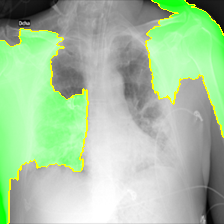
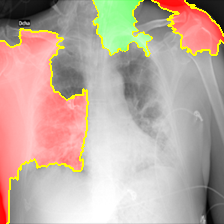

SHAP:



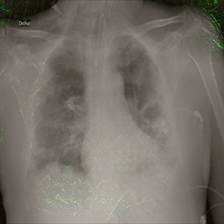
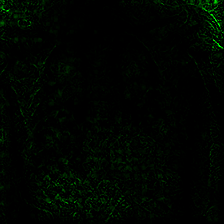

IG:



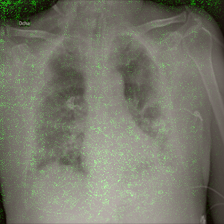
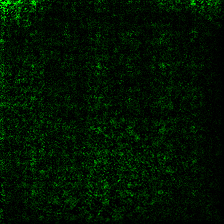

In [30]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

###6.4. Explaining True Negatives (Normal -> Normal)

In [31]:
input_img = preprocess(tn_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 27ms/step
((1, 'Normal'), (0, 'COVID'))


In [32]:
local_explanations = explainer.explain(tn_img)

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/shap/explainers/_deep/deep_tf.py:100: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



PREDICT:


LIME:



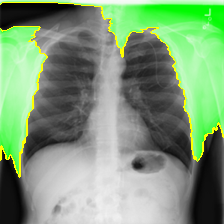
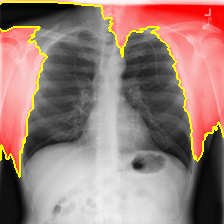

SHAP:



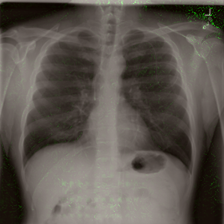
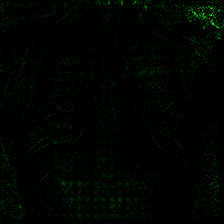

IG:



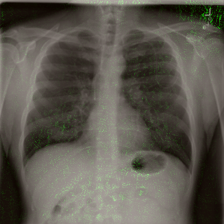
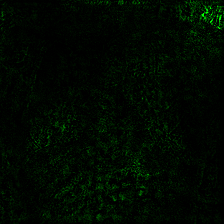

In [33]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

###6.5. Explaining False Positives (Normal -> Covid)

In [34]:
input_img = preprocess(fp_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 25ms/step
((0, 'COVID'), (1, 'Normal'))


In [35]:
local_explanations = explainer.explain(fp_img)

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/shap/explainers/_deep/deep_tf.py:100: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



PREDICT:


LIME:



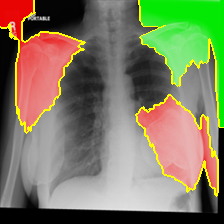
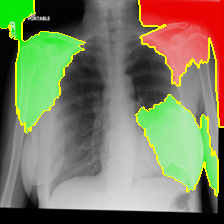

SHAP:



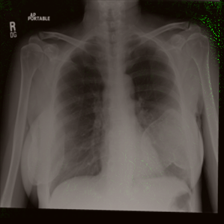
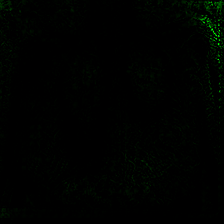

IG:



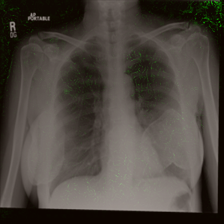
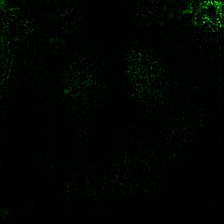

In [36]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

###6.6. Explaining False Negatives (Covid -> Normal)

In [37]:
input_img = preprocess(fn_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 36ms/step
((1, 'Normal'), (0, 'COVID'))


In [38]:
local_explanations = explainer.explain(fn_img)

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/shap/explainers/_deep/deep_tf.py:100: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



PREDICT:


LIME:



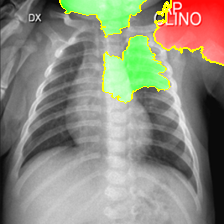
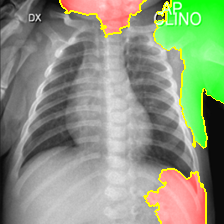

SHAP:



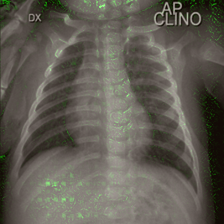
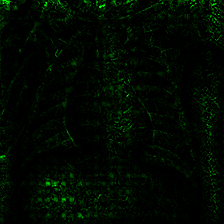

IG:



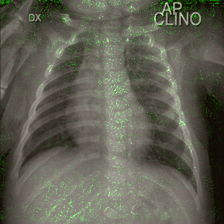
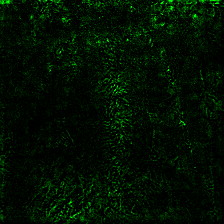

In [39]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

##7. Model Specific

###7.1. Preparing Explainers

In [40]:
def find_target_layer(model):
  # attempt to find the final convolutional layer in the network
  # by looping over the layers of the network in reverse order
  for layer in reversed(model.layers):
    # check to see if the layer has a 4D output
    if len(layer.output_shape) == 4:
      return layer
  # otherwise, we could not find a 4D layer so the GradCAM
  # algorithm cannot be applied
  raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

In [41]:
target_layer = find_target_layer(resnet_model)

In [42]:
explainer = VisionExplainer(
    explainers=["gradcam", "layercam"],
    mode = "classification",
    model = resnet_model,
    preprocess = preprocess,
    params={
        "gradcam": {"target_layer": target_layer},
        "layercam": {"target_layer": target_layer},
    }
)

###7.2. Explaining True Positives (Covid -> Covid)

In [43]:
input_img = preprocess(tp_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 22ms/step
((0, 'COVID'), (1, 'Normal'))


In [44]:
local_explanations = explainer.explain(tp_img)

PREDICT:


GRADCAM:



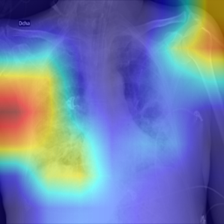
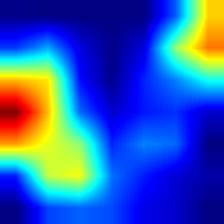

LAYERCAM:



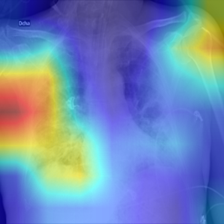
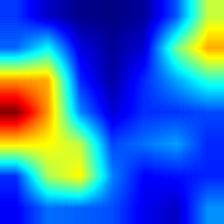

In [45]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

###7.3. Explaining True Negatives (Normal -> Normal)

In [46]:
input_img = preprocess(tn_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 22ms/step
((1, 'Normal'), (0, 'COVID'))


In [47]:
local_explanations = explainer.explain(tn_img)

PREDICT:


GRADCAM:



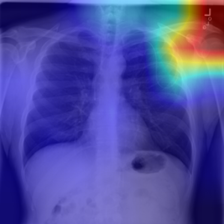
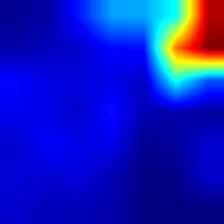

LAYERCAM:



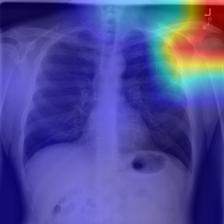
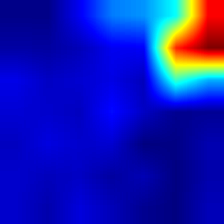

In [48]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

###7.4. Explaining False Positives (Normal -> Covid)

In [49]:
input_img = preprocess(fp_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 23ms/step
((0, 'COVID'), (1, 'Normal'))


In [50]:
local_explanations = explainer.explain(fp_img)

PREDICT:


GRADCAM:



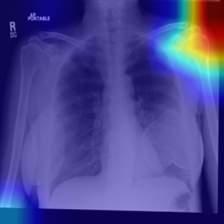
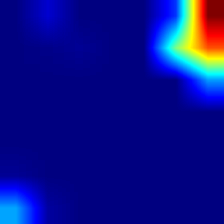

LAYERCAM:



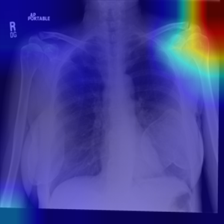
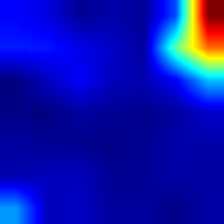

In [51]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

###7.5. Explaining False Negatives (Covid -> Normal)

In [52]:
input_img = preprocess(fn_img)
predictions = resnet_model.predict(input_img)
top_indices = np.argsort(predictions)[0, ::-1][:2]
r = tuple((i, labels[i]) for i in top_indices)
print(r)

1/1 [==============================] - 0s 30ms/step
((1, 'Normal'), (0, 'COVID'))


In [53]:
local_explanations = explainer.explain(fn_img)

PREDICT:


GRADCAM:



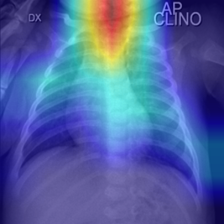
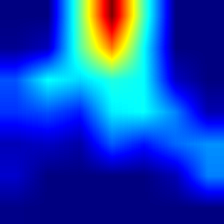

LAYERCAM:



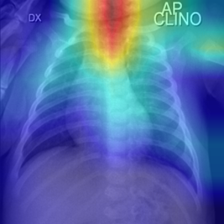
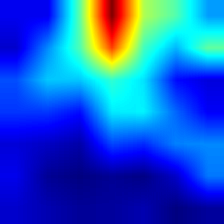

In [54]:
index = 0
for name, explanations in local_explanations.items():
    print(f"{name.upper()}:")
    explanations.ipython_plot(index, class_names = labels)

##8. TensorFlow-Keras-Visualizer

###8.1. Installing & Importing tf-keras-vis

In [55]:
! pip install tf-keras-vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from tensorflow.keras.preprocessing.image import load_img
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore, BinaryScore
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

In [57]:
replace2linear = ReplaceToLinear()
score = CategoricalScore([0, 1, 0, 1])

###8.2. Preparing Data to be Explained

In [58]:
# Image titles
image_titles = ['TP (Covid -> Covid)', ' TN (Normal -> Normal)', 'FP (Normal -> Covid)', 'FN (Covid -> Normal)']

tp_img = load_img(C_C_TP[2], target_size=(224, 224))
tn_img = load_img(N_N_TN[0], target_size=(224, 224))
fp_img = load_img(N_C_FP[-1], target_size=(224, 224))
fn_img = load_img(C_N_FN[0], target_size=(224, 224))
images = np.asarray([np.array(tp_img), np.array(tn_img), np.array(fp_img), np.array(fn_img)])

X = preprocess_input(images)

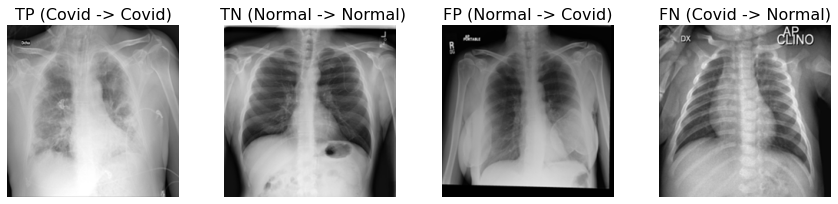

In [59]:
# Rendering
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('xray_samples.png')
plt.show()

###8.3. Explaining the Images using Smooth-Grad

In [60]:
# Create Saliency object.
saliency = Saliency(resnet_model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

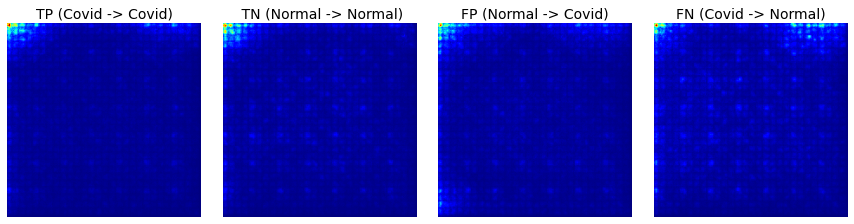

In [61]:
# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('resnet_smoothgrad.png')
plt.show()

###8.4. Explaining the Images using Grad-CAM

In [62]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

In [63]:
gradcam = Gradcam(resnet_model, model_modifier=replace2linear, clone=True)
cam = gradcam(score, X, penultimate_layer = -1)

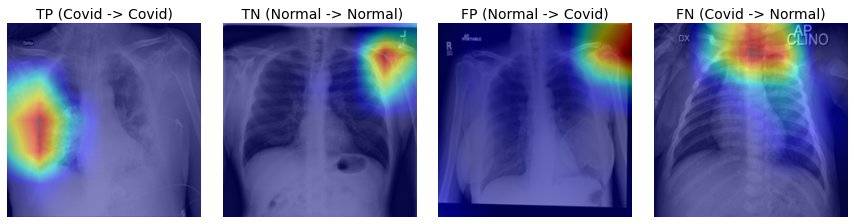

In [64]:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('resnet_gradcam.png')
plt.show()